In [31]:
#importing libraries
import numpy 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/shrey/Downloads/Assignment/16.Neural Networks/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
label_encoder = preprocessing.LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

In [4]:
df = df.drop(columns=['month','day','daymon','daytue','daywed','daythu','dayfri','daysat','daysun','monthjan','monthfeb','monthmar','monthapr','monthmay','monthjun','monthjul','monthaug','monthsep','monthoct','monthnov','monthdec'])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 38.5 KB


In [6]:
df.shape

(517, 10)

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


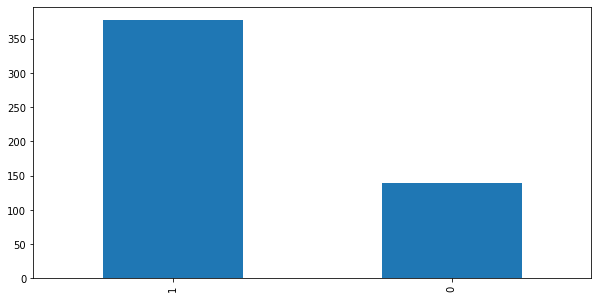

In [9]:
plt.figure(figsize=(10,5))
df.size_category.value_counts().plot.bar();

In [10]:
array = df.values

In [11]:
seed = 7 
numpy.random.seed(seed)
X = array[:, 0:9]
Y = array[:,9]

In [19]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [20]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [35]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 9,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [36]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

In [37]:
batch_size = [10,20]
epochs = [10,30]
learning_rate = [0.001,0.1]
dropout_rate = [0.0,0.1]
activation_function = ['softmax','relu']
init = ['normal']
neuron1 = [4,8]
neuron2 = [2,4]

In [38]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [39]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 1/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; to

[CV 2/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 3/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 4/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 6/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 5/5; 6/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 6/128] END activation_function=softmax, batch_siz

[CV 3/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 11/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 5/5; 11/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 11/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 12/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 12/128] END activation_function

[CV 4/5; 16/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.8s
[CV 5/5; 16/128] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 16/128] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.8s
[CV 1/5; 17/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 17/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 17/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 17/128] END activation_function=softm

[CV 5/5; 21/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 1/5; 22/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 22/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 2/5; 22/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 22/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 3/5; 22/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 22/128] END activation_function=softmax, ba

[CV 1/5; 27/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 27/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 27/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 27/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 27/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 4/5; 27/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 27/128] END activation_function

[CV 2/5; 32/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 32/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 32/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 4/5; 32/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 32/128] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 5/5; 32/128] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 32/128] END activation_function=softmax, ba

[CV 3/5; 37/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 4/5; 37/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 37/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 5/5; 37/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 37/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 1/5; 38/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 38/128] END activation_function=softmax, ba

[CV 4/5; 42/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 5/5; 42/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 42/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 43/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 43/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.6s
[CV 2/5; 43/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 43/128] END activation_function

[CV 5/5; 47/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 1/5; 48/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 48/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 2/5; 48/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 48/128] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 48/128] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 48/128] END activation_function=softmax, ba

[CV 1/5; 53/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 53/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 53/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 3/5; 53/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 53/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 4/5; 53/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 53/128] END activation_function=softmax, ba

[CV 2/5; 58/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 58/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 58/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 58/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 58/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 58/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 58/128] END activation_function

[CV 3/5; 63/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 4/5; 63/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 63/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 5/5; 63/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 63/128] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 1/5; 64/128] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 64/128] END activation_function=softmax, ba

[CV 5/5; 68/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 69/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 69/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 2/5; 69/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 69/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 69/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 69/128] END activation_function=relu, batch_size=10, dropou

[CV 2/5; 74/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.1s
[CV 3/5; 74/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 74/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 74/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 74/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.8s
[CV 5/5; 74/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 74/128] END activation_function=relu, batch_size=

[CV 4/5; 79/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 5/5; 79/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 79/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 80/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 80/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 2/5; 80/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 80/128] END activation_function=relu, batch_size=10, dropout_

[CV 1/5; 85/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 85/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 85/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.6s
[CV 3/5; 85/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 85/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.6s
[CV 4/5; 85/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 85/128] END activation_function=relu, batch_size=10, dropout_

[CV 3/5; 90/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 90/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 90/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 5/5; 90/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 90/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.0s
[CV 1/5; 91/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 91/128] END activation_function=relu, batch_size=

[CV 5/5; 95/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 96/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 96/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 2/5; 96/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 96/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 3/5; 96/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 96/128] END activation_function=relu, batch_size=10, dropout_

[CV 2/5; 101/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 3/5; 101/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 101/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 4/5; 101/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 101/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 5/5; 101/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 101/128] END activation_function=relu, batch_size=20, d

[CV 4/5; 106/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 106/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 106/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 107/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 107/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 107/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 107/128] END activation_function=relu, batc

[CV 1/5; 112/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 2/5; 112/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 112/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 112/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 112/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 4/5; 112/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 112/128] END activation_function=relu, batch_size=20, d

[CV 3/5; 117/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 4/5; 117/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 117/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 5/5; 117/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 117/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.4s
[CV 1/5; 118/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 118/128] END activation_function=relu, batch_size=20, d

[CV 5/5; 122/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 123/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.6s
[CV 2/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 123/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 123/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 123/128] END activation_function=relu, batc

[CV 2/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 128/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 128/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=30, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 128/128] END activation_function=relu, batch_size=20, d

In [40]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9806012034416198, using {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 30, 'init': 'normal', 'learning_rate': 0.1, 'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
0.

In [41]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(8,input_dim = 9,kernel_initializer = 'normal',activation = 'relu'))
    model1.add(Dropout(0.0))
    model1.add(Dense(4,kernel_initializer = 'normal',activation = 'relu'))
    model1.add(Dropout(0.0))
    model1.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.1)
    model1.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model1

In [42]:
model1 = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 30)

In [43]:
model1.fit(X_standardized,Y)

In [44]:
Y_predict = model1.predict(X_standardized)

In [45]:
print(accuracy_score(Y,Y_predict))

0.9864603481624759
